# Step 1: Decision Tree Surrogate Model
---
Goal of the notebook: Implement a decision tree as the surrogate model.

Inputs of the notebook:

Output of the notebook:


Takeaways:

Questions, thoughts and remarks:

## Dependencies and path
Adjust the argument in `sys.path.append` to align with your specific requirements.

In [2]:
import pandas as pd 
import numpy as np
import os
import sys

%load_ext autoreload
%autoreload 2

sys.path.append('C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/Data Science for Business HEC x Polytechnique/Year 2/Algorithmic Fairness and Interpretability/final_project/afi_final_project')

## 1. Load the data

In [8]:
df = pd.read_excel(
    "C:/Users/dorab/OneDrive - Ecole Polytechnique/Documents/Data Science for Business HEC x Polytechnique/Year 2/Algorithmic Fairness and Interpretability/final_project/afi_final_project/data/dataproject2024.xlsx"
)

In [9]:
df

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,Default (y),Pred_default (y_hat),PD,Group
0,1,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0.024480,1
1,2,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0.331661,0
2,3,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0.187505,0
3,4,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0.035441,1
4,5,1,61,7700,8526,0,48,0.123404,0,1,0,1,0,0.340883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,7426,9,38,4502,4856,0,48,0.083846,1,0,0,1,0,0.217708,0
7426,7427,1,33,22900,17900,0,60,0.098000,0,0,0,0,0,0.063937,0
7427,7428,3,27,25858,25972,0,24,0.181667,0,0,0,0,1,0.630863,0
7428,7429,6,32,12300,11300,0,72,0.091963,0,0,1,0,0,0.067551,0


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = df[
    [
        "Job tenure",
        "Age",
        "Car price",
        "Funding amount",
        "Down payment",
        "Loan duration",
        "Monthly payment",
        "Credit event",
        "Married",
        "Homeowner",
    ]
]
y = df["PD"]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

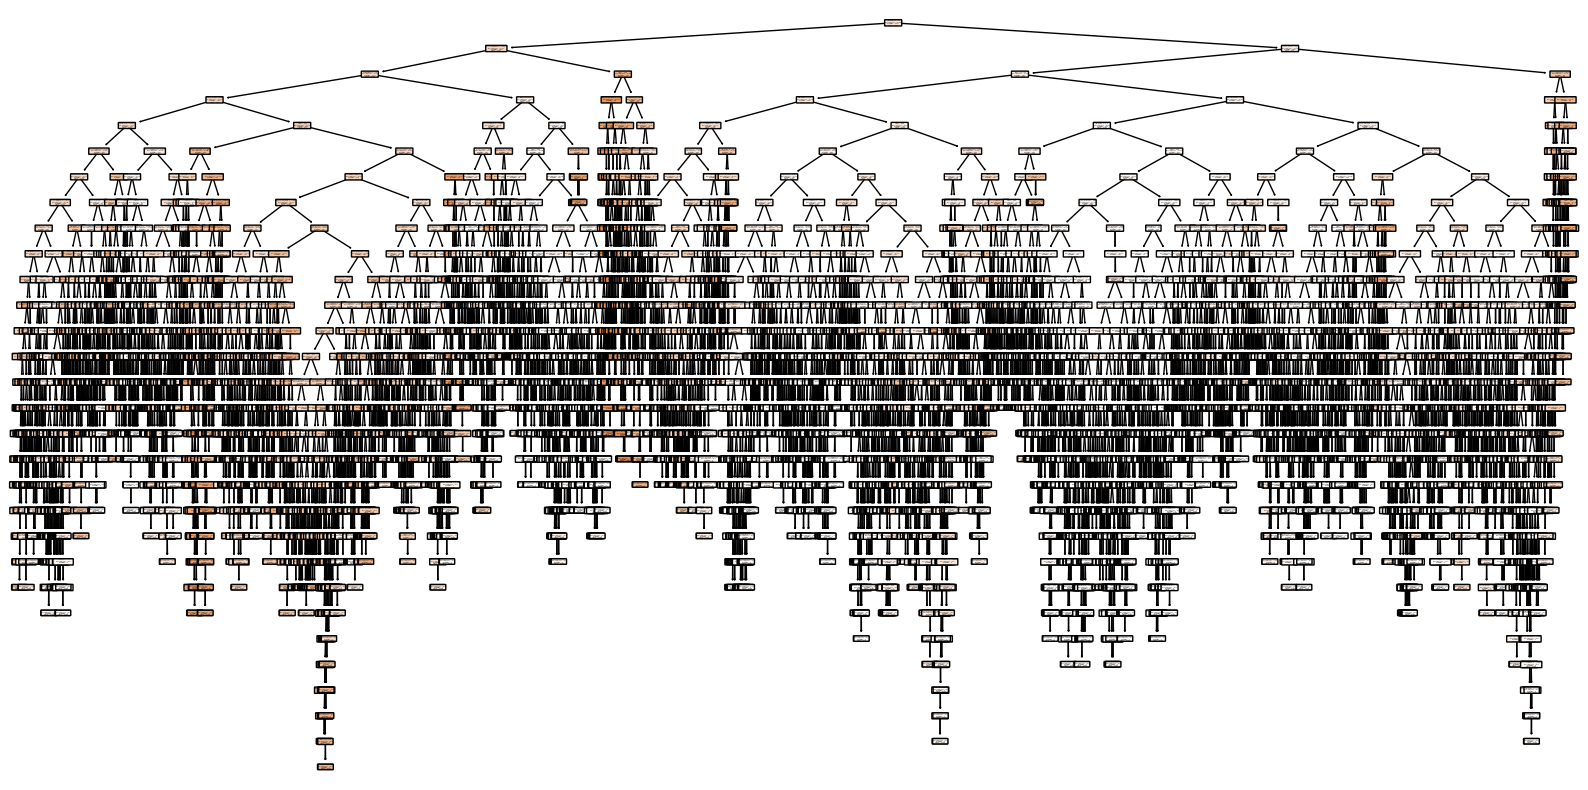

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set up the plot size (adjust as needed)
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)

# Show the plot
plt.show()

In [12]:
# Predicting on the test set for both models
y_pred_tree = tree.predict(X_test)

Decision Tree - MSE: 0.023790800179168237, MAE: 0.10245844324924425, R²: 0.4575206767100365
Feature Importance from Decision Tree: [0.21158501 0.11440695 0.13947528 0.22683818 0.00178534 0.06597961
 0.08718579 0.05048691 0.03817458 0.06408236]


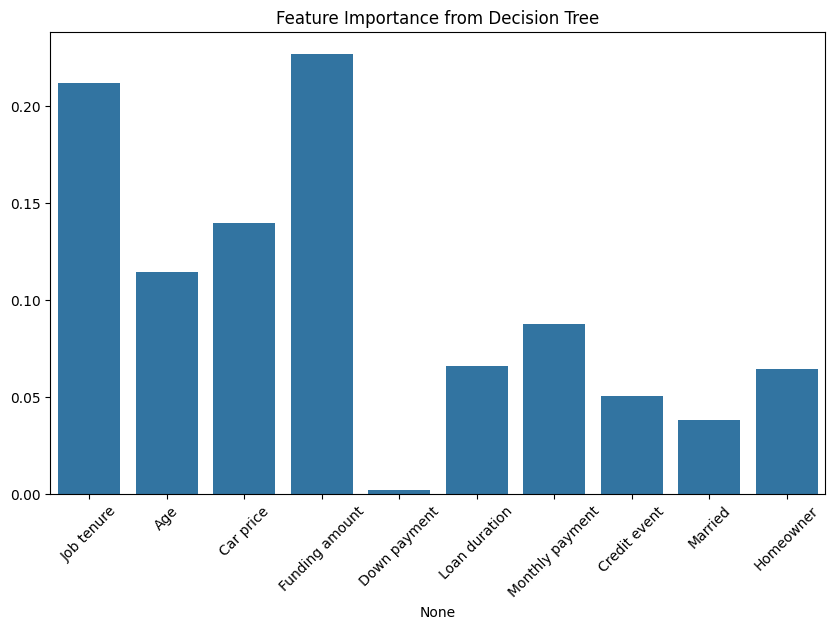

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# Calculating the Mean Squared Error for both models
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Checking feature importance for Decision Tree
tree_feature_importance = tree.feature_importances_

# Output the MSE and feature importance for Decision Tree
print(f"Decision Tree - MSE: {mse_tree}, MAE: {mae_tree}, R²: {r2_tree}")
print("Feature Importance from Decision Tree:", tree_feature_importance)

# Visualization of Decision Tree feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=tree_feature_importance)
plt.title("Feature Importance from Decision Tree")
plt.xticks(rotation=45)
plt.show()

- MSE: The MSE is 0.02379, which indicates how well the surrogate model approximates the unknown model's output. The lower the MSE, the better the approximation. Here it is quite low, so the model seems to fit the data well.

- Feature Importance: The feature importance from the surrogate model shows which features are driving the predictions of the unknown model. From the provided bar chart, it can be sees that:
    - Funding amount and Job tenure have the highest importance, which suggests that these features have a significant influence on the PD.
    - Age and Car price are also important features but to a lesser extent.
    - Features like Loan duration, Monthly payment, and Homeowner contribute moderately to the model.

We get very different results in terms of feature importance between the decision tree surrogate model and the linear regression surrogate model. This is to be expected as they are 2 models which work very differently. Most importantly, the linear regression surrogate model does not take into account non-linear relationships between the features in the target variable. Given our EDA we find non-linear relationships in our data and thus trust the decision tree surrogate model more.


Comparing the metrics of the 2 surrogate models we notice that the decision tree always gives better results, further confirming our conclusion.